# CNN + Pre processamento + PCA

#   Bibliotecas

In [1]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack #utilizada para a junção de matrizes

In [2]:
#Pré processamento de colunas

from sklearn.model_selection import train_test_split #Divisão do dataset entre treino e teste
from sklearn.feature_extraction.text import TfidfVectorizer #vetorização do dataset
from sklearn.preprocessing import OneHotEncoder #aplicação de dummy

In [3]:
#Pré processamento de texto


import nltk
from nltk import word_tokenize #tokenizador
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords   #stopword

nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#import de funções do arquivo pre_processamento

from pre_processamento import pre_processamento, text_preprocess, textcolumns_junct,stemming

In [5]:
# Modelo a ser testado

from keras.layers import Input, Dense
from keras.models import Model

In [6]:
#metricas

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [7]:
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/Datasets/train.tsv', sep = '\t')
test = pd.read_csv('/content/drive/MyDrive/Datasets/test.tsv', sep = '\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train,test = pre_processamento(train,test)

#   Análise estatística

In [9]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [10]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [11]:
train.describe()

,item_condition_id,price,shipping,stock,datetime_month,datetime_year
count,1.481661e+06,1.481661e+06,1.481661e+06,1.481661e+06,1.474770e+06,1474770.0
mean,1.907322e+00,2.675329e+01,4.473257e-01,1.178550e+01,6.517894e+00,2018.0
std,9.031759e-01,3.859198e+01,4.972178e-01,1.056099e+01,3.194489e+00,0.0
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2018.0
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,4.000000e+00,2018.0
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00,7.000000e+00,2018.0
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01,9.000000e+00,2018.0
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01,1.200000e+01,2018.0


In [12]:
train.isnull().sum()  #necessário valair forma de tratar os valores nulos.

name                      0
item_condition_id         0
category_name          6314
brand_name           632336
price                     0
shipping                  0
item_description          4
stock                     0
gen_cat                   0
sub1_cat                  0
sub2_cat                  0
datetime_month         6891
datetime_year          6891
dtype: int64

In [13]:
train.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b8dcc58d0>,
      dtype=object)

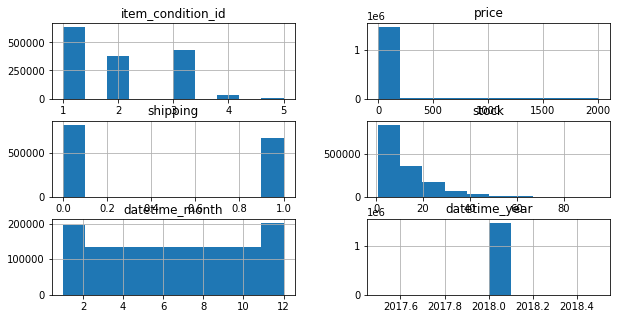

In [14]:
train.hist(figsize=(10,5))

In [15]:
X = train.drop("price", axis = 1)
y = train["price"]

In [16]:
X.shape

(1481661, 12)

#   Pré-processamento 

In [17]:
X = textcolumns_junct(X)

In [18]:
#Convertendo tudo para string

X["item_description"] = X["item_description"].astype(str)

In [19]:
X["item_description"] = X["item_description"].apply(lambda x: text_preprocess(x)) #Limpando texto com regex.


In [20]:
X["item_description"] = X["item_description"].apply(lambda x: word_tokenize(x)) #tokenizando

In [21]:
X["item_description"] = X["item_description"].apply(lambda x: stemming(x))

In [22]:
X["item_description"]=[" ".join(review) for review in X["item_description"].values]

In [23]:
X.head()

,item_condition_id,category_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,3,Men/Tops/T-shirts,1,mlb cincinnati red shirt size xl descript yet,27,Men,Tops,T-shirts,6.0,2018.0
1,3,Electronics/Computers & Tablets/Components & P...,0,razer blackwidow chroma keyboard razer keyboar...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,1,Women/Tops & Blouses/Blouse,1,ava viv blous target ador top hint lace key ho...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,1,Home/Home Décor/Home Décor Accents,1,leather hors statu new tag . leather hors . re...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,1,Women/Jewelry/Necklaces,0,24k gold plate rose complet certif authent,13,Women,Jewelry,Necklaces,5.0,2018.0


In [24]:
X["item_description"]

0              mlb cincinnati red shirt size xl descript yet
1          razer blackwidow chroma keyboard razer keyboar...
2          ava viv blous target ador top hint lace key ho...
3          leather hors statu new tag . leather hors . re...
4                 24k gold plate rose complet certif authent
                                 ...                        
1482530    free peopl inspir dress free peopl lace say si...
1482531    littl mermaid handmad dress disney littl merma...
1482532    21 day fix contain eat plan use twice still gr...
1482533    world market lantern 2 one see 2 red 2 orang 2...
1482534    brand new lux de vill wallet new tag red spark...
Name: item_description, Length: 1481661, dtype: object

#   Split

In [25]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=10) #Divisão em 80/20

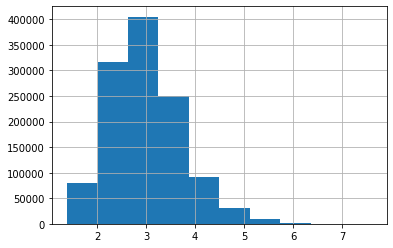

In [26]:
#Normalizando, com log, o target (price), foi realizado de forma separada para nao terem dados vazados.

ytrain_log =  np.log1p(ytrain)
yval_log =  np.log1p(yval)
ytrain_log.hist()

# Transformadores

In [27]:
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df = 50, max_df = 0.5) #vetorização, com stop word. 

In [28]:
vec_train = vec.fit_transform(Xtrain["item_description"])

vec_train

<1185328x66125 sparse matrix of type '<class 'numpy.float64'>'
	with 30866302 stored elements in Compressed Sparse Row format>

In [29]:
vec_val = vec.transform(Xval["item_description"])

vec_val

<296333x66125 sparse matrix of type '<class 'numpy.float64'>'
	with 7693221 stored elements in Compressed Sparse Row format>

In [30]:
ohe = OneHotEncoder(handle_unknown="ignore")

#aplicação dummy nas colunas categóricas.

ohe_train = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat",
                                         "datetime_month"]])
                            
ohe_train

<1185328x1008 sparse matrix of type '<class 'numpy.float64'>'
	with 7111968 stored elements in Compressed Sparse Row format>

In [31]:
ohe_val = ohe.transform(Xval[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat",
                                         "datetime_month"]])

ohe_val

<296333x1008 sparse matrix of type '<class 'numpy.float64'>'
	with 1777987 stored elements in Compressed Sparse Row format>

In [32]:
#juntando cada matrix gerada por cada pré-processamento
from sklearn.decomposition import TruncatedSVD

x_train = hstack([
                 (vec_train),
                 (ohe_train)
                 	
                                     ],format='csr') 

svd = TruncatedSVD(n_components=100, algorithm = 'arpack', tol=0.1)

x_train = svd.fit_transform(x_train)
x_train

array([[ 1.31565923e+00, -8.98861744e-01, -2.46907373e-01, ...,
         3.01647657e-02,  1.23472886e-02, -3.82986825e-03],
       [ 7.09911814e-01,  4.26623756e-01, -5.68694043e-01, ...,
        -2.20821395e-03,  2.85521168e-03, -2.56004946e-03],
       [ 1.01489731e+00,  1.41270345e+00,  5.61624956e-01, ...,
         1.38280836e-04, -1.53208255e-03,  1.78236175e-03],
       ...,
       [ 8.65844175e-01, -6.57090816e-01,  2.75446954e-01, ...,
         1.76638423e-02, -1.21044228e-02,  7.16868342e-03],
       [ 1.40728887e+00, -9.26758058e-01, -3.23526999e-01, ...,
         2.80452659e-02,  1.83240529e-02, -2.03125562e-03],
       [ 7.52262853e-01,  3.92597555e-01, -5.33883585e-01, ...,
        -2.65459603e-02,  2.78555579e-02,  7.05969527e-04]])

In [33]:
x_val = hstack([
                 (vec_val),
                 (ohe_val),
                             ], format='csr') 

x_val = svd.transform(x_val)
x_val

array([[ 8.39670441e-01,  1.07070354e+00,  1.52329681e-01, ...,
        -8.50007491e-03,  9.99987679e-03,  1.65492565e-02],
       [ 1.00229418e+00, -4.30252087e-02,  9.74134763e-01, ...,
        -9.50354825e-03,  9.95702096e-03, -9.41835259e-03],
       [ 9.04128037e-01,  1.26220585e+00,  3.94903639e-01, ...,
        -1.03468369e-03, -2.78167135e-03,  7.88065080e-03],
       ...,
       [ 1.34046581e+00, -9.15383095e-01, -2.43221848e-01, ...,
        -9.19578956e-04,  7.11545578e-04,  2.51060062e-03],
       [ 8.91024533e-01,  1.11126822e+00,  1.51396036e-01, ...,
        -1.33980211e-02, -9.87470196e-04,  1.20996711e-02],
       [ 1.23515245e+00,  2.87399442e-01, -1.17601248e+00, ...,
        -1.06173440e-02, -2.94609103e-03,  8.90258568e-03]])

# Modelo

In [41]:
from tensorflow.keras.backend import clear_session

clear_session()

In [42]:
from keras.layers import Input, Dense, Reshape, Conv1D, BatchNormalization, Activation, Flatten, AveragePooling1D, MaxPooling1D
from keras.models import Model

input = Input(shape=(x_train.shape[-1]), name='input')
dense3 = Dense(1024, activation="PReLU") (input)
dense4 = Dense(512, activation="PReLU") (dense3)
reshape1 = Reshape((512,1)) (dense4)
conv1 = Conv1D(16,2,activation='PReLU') (reshape1)
act1 = Activation('PReLU') (conv1)
pool1 = MaxPooling1D() (act1)
flat1 = Flatten() (pool1)

dense5 = Dense(256, activation="PReLU") (flat1)

reshape2 = Reshape((256,1)) (dense5)
conv2 = Conv1D(16,2,activation='PReLU') (reshape2)
act2 = Activation('PReLU') (conv2)
pool2 = AveragePooling1D() (act2)
flat2 = Flatten() (pool2)

dense6 = Dense(128, activation="PReLU") (dense5)
out = Dense(1, activation='PReLU') (dense6)

model = Model(inputs = input, outputs = out)

model.summary()

#Tentar dropar os bundles

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 1024)              104448    
                                                                 
 dense_1 (Dense)             (None, 512)               525312    
                                                                 
 reshape (Reshape)           (None, 512, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 511, 16)           8224      
                                                                 
 activation (Activation)     (None, 511, 16)           8176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 255, 16)          0     

In [43]:
ytrain_log.values.shape

(1185328,)

In [44]:
from tensorflow.keras.metrics import RootMeanSquaredError

model.compile(loss="mean_squared_error", metrics=['mean_squared_error', 'mean_squared_logarithmic_error', RootMeanSquaredError()], optimizer = 'adam')
history1 = model.fit(x_train, ytrain_log.values, batch_size=2048, epochs=10, verbose=True)

Epoch 1/10
579/579 [==============================] - 22s 36ms/step - loss: 0.4634 - mean_squared_error: 0.4634 - mean_squared_logarithmic_error: 0.0315 - root_mean_squared_error: 0.6807
Epoch 2/10
579/579 [==============================] - 21s 36ms/step - loss: 0.3924 - mean_squared_error: 0.3924 - mean_squared_logarithmic_error: 0.0239 - root_mean_squared_error: 0.6264
Epoch 3/10
579/579 [==============================] - 21s 36ms/step - loss: 0.3842 - mean_squared_error: 0.3842 - mean_squared_logarithmic_error: 0.0234 - root_mean_squared_error: 0.6198
Epoch 4/10
579/579 [==============================] - 21s 35ms/step - loss: 0.3791 - mean_squared_error: 0.3791 - mean_squared_logarithmic_error: 0.0231 - root_mean_squared_error: 0.6157
Epoch 5/10
579/579 [==============================] - 21s 36ms/step - loss: 0.3732 - mean_squared_error: 0.3732 - mean_squared_logarithmic_error: 0.0228 - root_mean_squared_error: 0.6109
Epoch 6/10
579/579 [==============================] - 21s 36ms/st

In [45]:
print("\n")
scoreMLP = model.evaluate(x_val, yval_log.values)
print(model.metrics_names)
print("mse: ", scoreMLP[1])
print("msle: ", scoreMLP[2])
print("rmse: ", scoreMLP[3])



9261/9261 [==============================] - 29s 3ms/step - loss: 0.3589 - mean_squared_error: 0.3589 - mean_squared_logarithmic_error: 0.0218 - root_mean_squared_error: 0.5991
['loss', 'mean_squared_error', 'mean_squared_logarithmic_error', 'root_mean_squared_error']
mse:  0.35888564586639404
msle:  0.021782029420137405
rmse:  0.59907066822052


In [46]:
import math

y_pred = [math.exp(i)-1 for i in model.predict(x_val)]

print(mean_absolute_error(yval,y_pred))
print(mean_squared_error(yval,y_pred))
print(mean_squared_log_error(yval,y_pred))

13.373541988665872
1238.7540646922218
0.35888611057260933


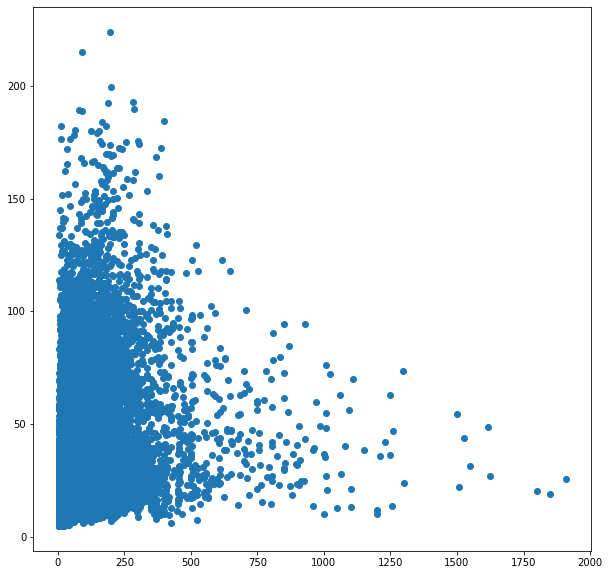

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x=yval, y=y_pred)